In [1]:
import as_seg.CBM_algorithm as CBM
import as_seg.barwise_input as bi
import as_seg.data_manipulation as dm
import as_seg.autosimilarity_computation as as_comp
#import as_seg.barwise_input as bi
from as_seg.model.current_plot import *

import math
import numpy as np
import pandas as pd
import mirdata
import os
import tensorly as tl

In [ ]:
plt.rcParams.update({'font.size': 16})
plt.set_cmap(cm.Greys)

feature = "pcp"#"log_mel_grill"
subdivision = 96
hop_length = 32
hop_length_seconds = hop_length/44100
song_name = 1
spectrogram, bars, references_segments = scr.load_spec_annot_cometogether(feature, hop_length)

barwise_TF_matrix = bi.barwise_TF_matrix(spectrogram, bars, hop_length_seconds, subdivision)

fig, axs = plt.subplots(1, 1, figsize=(6,6))
autosimil_1 = as_comp.switch_autosimilarity(barwise_TF_matrix, similarity_type = "cosine", normalise = True)
padded_spec_1 = pad_factor(autosimil_1)
axs.pcolormesh(np.arange(padded_spec_1.shape[0]), np.arange(padded_spec_1.shape[0]), padded_spec_1)
#axs.set_title('Cosine autosimilarity')
axs.invert_yaxis()
axs.set_yticks(range(0,81,20))
axs.set_xlabel("Bar indices")
axs.set_ylabel("Bar indices")
plt.show()

fig, axs = plt.subplots(1, 1, figsize=(6,6))

autosimil_3 = as_comp.switch_autosimilarity(barwise_TF_matrix, similarity_type = "RBF", normalise = True)
padded_spec_3 = pad_factor(autosimil_3)
axs.pcolormesh(np.arange(padded_spec_3.shape[0]), np.arange(padded_spec_3.shape[0]), padded_spec_3)
#axs.set_title('RBF autosimilarity')
axs.invert_yaxis()
axs.set_yticks(range(0,81,20))

axs.set_xlabel("Bar indices")
fig.savefig(f"autosimilarities.pdf", bbox_inches = "tight")#, format='png')

plt.show()

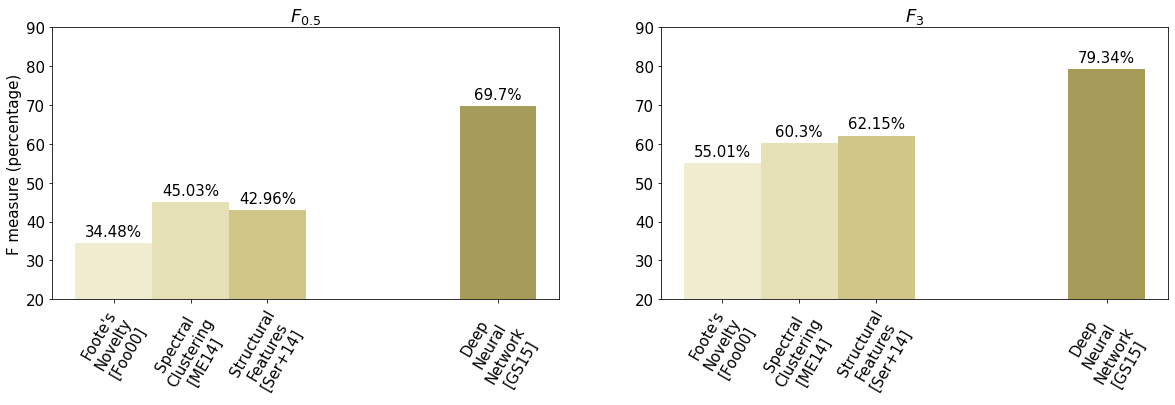

In [5]:
# RWC
plt.rcParams.update({'font.size': 15})


width = 0.5

# Baselines
#baseline_f_mes_zero_five = [34.48,28.81,45.03,42.96,69.70] baseline_f_mes_three = [55.01,46.53,60.30,62.15,79.34]
baseline_f_mes_zero_five = [34.48,45.03,42.96,69.70] 
baseline_f_mes_three = [55.01,60.30,62.15,79.34]

colors_baselines = ['#F0ECCF','#E6E0B6', '#D0C687','#A69C59']#['lightblue','skyblue','deepskyblue','darkturquoise','steelblue'] #deepskyblue
#algos_baselines = ['Foote\'s\nNovelty\n[Foo00]','CNMF\n[NJ13]','Spectral\nClustering\n[ME14a]','Structural\nFeatures\n[Ser+14]','CNN\n[GS15b]']
algos_baselines = ['Foote\'s\nNovelty\n[Foo00]','Spectral\nClustering\n[ME14]','Structural\nFeatures\n[Ser+14]','Deep\nNeural\nNetwork\n[GS15]']

indexes_baselines = [i * width for i in range(len(algos_baselines))]

indexes_baselines[-1] = indexes_baselines[-2] + 3 * width

fig, ax = plt.subplots(1, 2, figsize=(20,5))
for idx_x, x in enumerate(indexes_baselines):
    height = np.array(baseline_f_mes_zero_five)[idx_x]
    ax[0].bar(x, height, color=colors_baselines[idx_x], width=width)
    ax[0].text(x,height + 1, f"{height}%", ha='center', va='bottom', rotation = 0)
    
    height = np.array(baseline_f_mes_three)[idx_x]
    ax[1].bar(x, height, color=colors_baselines[idx_x], width=width)
    ax[1].text(x,height + 1, f"{height}%", ha='center', va='bottom', rotation = 0)

indexes = [i for i in indexes_baselines]
algos = [i for i in algos_baselines]



ax[0].set_xticks(indexes)
ax[0].set_xticklabels(algos, rotation = 60)
ax[0].set_ylabel("F measure (percentage)")
ax[0].set_title("$F_{0.5}$")
ax[0].set_ylim( 20,90 )

ax[1].set_xticks(indexes)
ax[1].set_xticklabels(algos, rotation = 60)
#ax[1].set_ylabel("F measure (percentage)")
ax[1].set_title("$F_{3}$")
ax[1].set_ylim( 20,90 )

#fig.savefig("C:\\Users\\amarmore\\Desktop\\Documents de travail\\Présentations\\Conf\\Posters\\ISMIR 2020\\gemini-master\\figs\\f_mes_plots.pdf", bbox_inches = "tight")#, format='png')

plt.show()

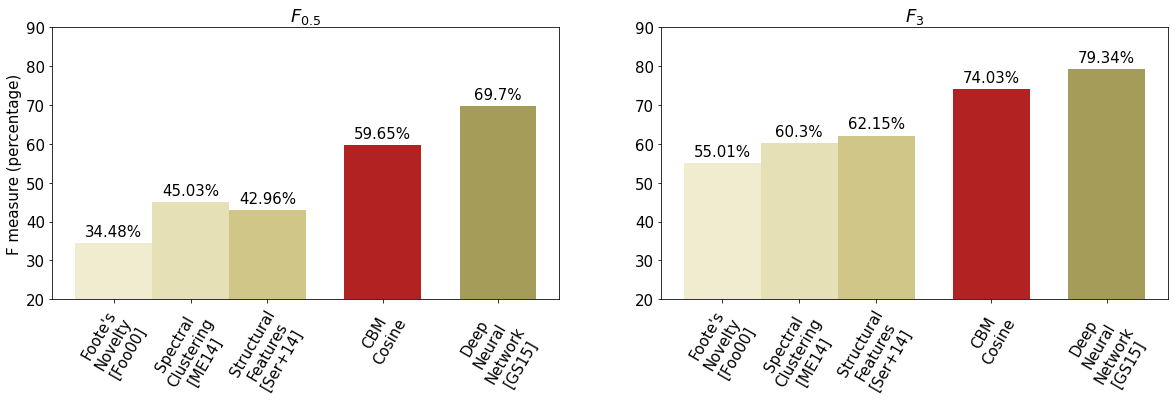

In [6]:
# RWC
plt.rcParams.update({'font.size': 15})


width = 0.5

# Baselines
#baseline_f_mes_zero_five = [34.48,28.81,45.03,42.96,69.70] baseline_f_mes_three = [55.01,46.53,60.30,62.15,79.34]
baseline_f_mes_zero_five = [34.48,45.03,42.96,69.70] 
baseline_f_mes_three = [55.01,60.30,62.15,79.34]

colors_baselines = ['#F0ECCF','#E6E0B6', '#D0C687','#A69C59']#['lightblue','skyblue','deepskyblue','darkturquoise','steelblue'] #deepskyblue
#algos_baselines = ['Foote\'s\nNovelty\n[Foo00]','CNMF\n[NJ13]','Spectral\nClustering\n[ME14a]','Structural\nFeatures\n[Ser+14]','CNN\n[GS15b]']
algos_baselines = ['Foote\'s\nNovelty\n[Foo00]','Spectral\nClustering\n[ME14]','Structural\nFeatures\n[Ser+14]','Deep\nNeural\nNetwork\n[GS15]']

indexes_baselines = [i * width for i in range(len(algos_baselines))]

indexes_baselines[-1] = indexes_baselines[-2] + 3 * width

fig, ax = plt.subplots(1, 2, figsize=(20,5))
for idx_x, x in enumerate(indexes_baselines):
    height = np.array(baseline_f_mes_zero_five)[idx_x]
    ax[0].bar(x, height, color=colors_baselines[idx_x], width=width)
    ax[0].text(x,height + 1, f"{height}%", ha='center', va='bottom', rotation = 0)
    
    height = np.array(baseline_f_mes_three)[idx_x]
    ax[1].bar(x, height, color=colors_baselines[idx_x], width=width)
    ax[1].text(x,height + 1, f"{height}%", ha='center', va='bottom', rotation = 0)

indexes = [i for i in indexes_baselines]
algos = [i for i in algos_baselines]

# CBM
color_CBM = ['firebrick']
algos.append("CBM\nCosine")
idx_cbm_pcp = indexes_baselines[-2] + 1.5 * width
indexes.append(idx_cbm_pcp)
f_mes_cbm_pcp = [59.65, 74.03]
ax[0].bar(idx_cbm_pcp, f_mes_cbm_pcp[0], color=color_CBM[0], width=width)
ax[0].text(idx_cbm_pcp,f_mes_cbm_pcp[0] + 1, f"{f_mes_cbm_pcp[0]}%", ha='center', va='bottom', rotation = 0)
ax[1].bar(idx_cbm_pcp, f_mes_cbm_pcp[1], color=color_CBM[0], width=width)
ax[1].text(idx_cbm_pcp,f_mes_cbm_pcp[1] + 1, f"{f_mes_cbm_pcp[1]}%", ha='center', va='bottom', rotation = 0)


ax[0].set_xticks(indexes)
ax[0].set_xticklabels(algos, rotation = 60)
ax[0].set_ylabel("F measure (percentage)")
ax[0].set_title("$F_{0.5}$")
ax[0].set_ylim( 20,90 )

ax[1].set_xticks(indexes)
ax[1].set_xticklabels(algos, rotation = 60)
#ax[1].set_ylabel("F measure (percentage)")
ax[1].set_title("$F_{3}$")
ax[1].set_ylim( 20,90 )

#fig.savefig("C:\\Users\\amarmore\\Desktop\\Documents de travail\\Présentations\\Conf\\Posters\\ISMIR 2020\\gemini-master\\figs\\f_mes_plots.pdf", bbox_inches = "tight")#, format='png')

plt.show()

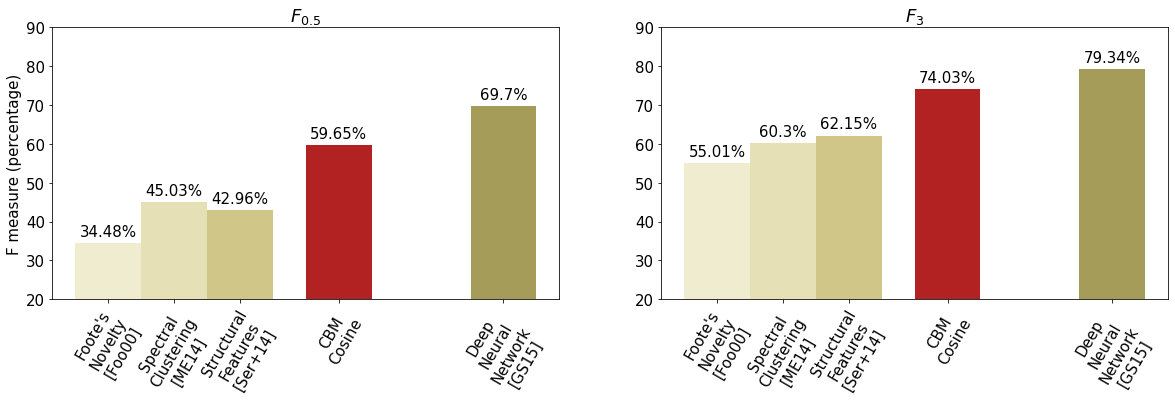

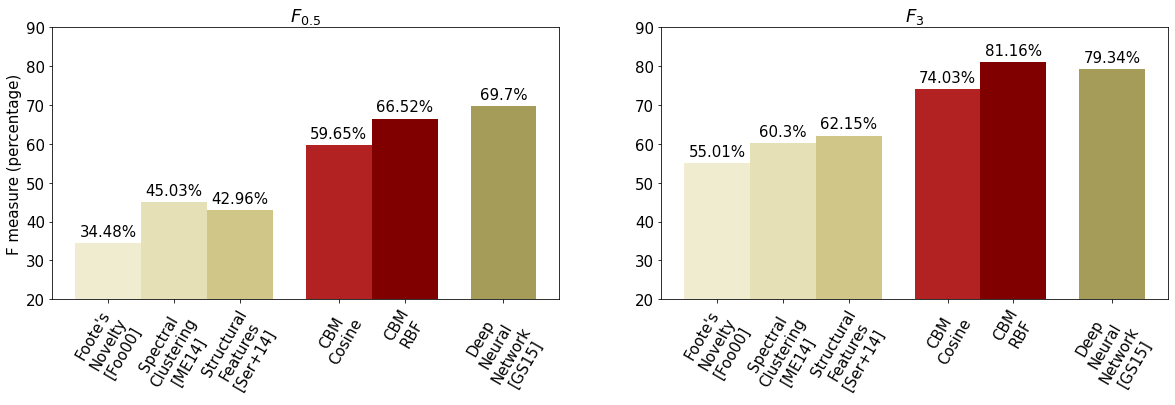

In [7]:
# RWC
plt.rcParams.update({'font.size': 15})


width = 0.5

# Baselines
#baseline_f_mes_zero_five = [34.48,28.81,45.03,42.96,69.70] baseline_f_mes_three = [55.01,46.53,60.30,62.15,79.34]
baseline_f_mes_zero_five = [34.48,45.03,42.96,69.70] 
baseline_f_mes_three = [55.01,60.30,62.15,79.34]

colors_baselines = ['#F0ECCF','#E6E0B6', '#D0C687','#A69C59']#deepskyblue
#algos_baselines = ['Foote\'s\nNovelty\n[Foo00]','CNMF\n[NJ13]','Spectral\nClustering\n[ME14a]','Structural\nFeatures\n[Ser+14]','CNN\n[GS15b]']
algos_baselines = ['Foote\'s\nNovelty\n[Foo00]','Spectral\nClustering\n[ME14]','Structural\nFeatures\n[Ser+14]','Deep\nNeural\nNetwork\n[GS15]']

indexes_baselines = [i * width for i in range(len(algos_baselines))]

indexes_baselines[-1] = indexes_baselines[-2] + 4 * width

fig, ax = plt.subplots(1, 2, figsize=(20,5))
for idx_x, x in enumerate(indexes_baselines):
    height = np.array(baseline_f_mes_zero_five)[idx_x]
    ax[0].bar(x, height, color=colors_baselines[idx_x], width=width)
    ax[0].text(x,height + 1, f"{height}%", ha='center', va='bottom', rotation = 0)
    
    height = np.array(baseline_f_mes_three)[idx_x]
    ax[1].bar(x, height, color=colors_baselines[idx_x], width=width)
    ax[1].text(x,height + 1, f"{height}%", ha='center', va='bottom', rotation = 0)

indexes = [i for i in indexes_baselines]
algos = [i for i in algos_baselines]


# CBM
color_CBM = ['firebrick']
algos.append("CBM\nCosine")
idx_cbm_pcp = indexes_baselines[-2] + 1.5 * width
indexes.append(idx_cbm_pcp)
f_mes_cbm_pcp = [59.65, 74.03]
ax[0].bar(idx_cbm_pcp, f_mes_cbm_pcp[0], color=color_CBM[0], width=width)
ax[0].text(idx_cbm_pcp,f_mes_cbm_pcp[0] + 1, f"{f_mes_cbm_pcp[0]}%", ha='center', va='bottom', rotation = 0)
ax[1].bar(idx_cbm_pcp, f_mes_cbm_pcp[1], color=color_CBM[0], width=width)
ax[1].text(idx_cbm_pcp,f_mes_cbm_pcp[1] + 1, f"{f_mes_cbm_pcp[1]}%", ha='center', va='bottom', rotation = 0)

ax[0].set_xticks(indexes)
ax[0].set_xticklabels(algos, rotation = 60)
ax[0].set_ylabel("F measure (percentage)")
ax[0].set_title("$F_{0.5}$")
ax[0].set_ylim( 20,90 )

ax[1].set_xticks(indexes)
ax[1].set_xticklabels(algos, rotation = 60)
#ax[1].set_ylabel("F measure (percentage)")
ax[1].set_title("$F_{3}$")
ax[1].set_ylim( 20,90 )

#fig.savefig("C:\\Users\\amarmore\\Desktop\\Documents de travail\\Présentations\\Conf\\Posters\\ISMIR 2020\\gemini-master\\figs\\f_mes_plots.pdf", bbox_inches = "tight")#, format='png')

plt.show()

# RWC
plt.rcParams.update({'font.size': 15})


width = 0.5

# Baselines
#baseline_f_mes_zero_five = [34.48,28.81,45.03,42.96,69.70] baseline_f_mes_three = [55.01,46.53,60.30,62.15,79.34]
baseline_f_mes_zero_five = [34.48,45.03,42.96,69.70] 
baseline_f_mes_three = [55.01,60.30,62.15,79.34]

colors_baselines = ['#F0ECCF','#E6E0B6', '#D0C687','#A69C59']#deepskyblue
#algos_baselines = ['Foote\'s\nNovelty\n[Foo00]','CNMF\n[NJ13]','Spectral\nClustering\n[ME14a]','Structural\nFeatures\n[Ser+14]','CNN\n[GS15b]']
algos_baselines = ['Foote\'s\nNovelty\n[Foo00]','Spectral\nClustering\n[ME14]','Structural\nFeatures\n[Ser+14]','Deep\nNeural\nNetwork\n[GS15]']

indexes_baselines = [i * width for i in range(len(algos_baselines))]

indexes_baselines[-1] = indexes_baselines[-2] + 4 * width

fig, ax = plt.subplots(1, 2, figsize=(20,5))
for idx_x, x in enumerate(indexes_baselines):
    height = np.array(baseline_f_mes_zero_five)[idx_x]
    ax[0].bar(x, height, color=colors_baselines[idx_x], width=width)
    ax[0].text(x,height + 1, f"{height}%", ha='center', va='bottom', rotation = 0)
    
    height = np.array(baseline_f_mes_three)[idx_x]
    ax[1].bar(x, height, color=colors_baselines[idx_x], width=width)
    ax[1].text(x,height + 1, f"{height}%", ha='center', va='bottom', rotation = 0)

indexes = [i for i in indexes_baselines]
algos = [i for i in algos_baselines]


# CBM
color_CBM = ['firebrick']
algos.append("CBM\nCosine")
idx_cbm_pcp = indexes_baselines[-2] + 1.5 * width
indexes.append(idx_cbm_pcp)
f_mes_cbm_pcp = [59.65, 74.03]
ax[0].bar(idx_cbm_pcp, f_mes_cbm_pcp[0], color=color_CBM[0], width=width)
ax[0].text(idx_cbm_pcp,f_mes_cbm_pcp[0] + 1, f"{f_mes_cbm_pcp[0]}%", ha='center', va='bottom', rotation = 0)
ax[1].bar(idx_cbm_pcp, f_mes_cbm_pcp[1], color=color_CBM[0], width=width)
ax[1].text(idx_cbm_pcp,f_mes_cbm_pcp[1] + 1, f"{f_mes_cbm_pcp[1]}%", ha='center', va='bottom', rotation = 0)

color_CBM = ['maroon']
algos.append("CBM\nRBF")
idx_cbm_pcp = indexes_baselines[-2] + 2.5 * width
indexes.append(idx_cbm_pcp)
f_mes_cbm_pcp = [66.52, 81.16]
ax[0].bar(idx_cbm_pcp, f_mes_cbm_pcp[0], color=color_CBM[0], width=width)
ax[0].text(idx_cbm_pcp,f_mes_cbm_pcp[0] + 1, f"{f_mes_cbm_pcp[0]}%", ha='center', va='bottom', rotation = 0)
ax[1].bar(idx_cbm_pcp, f_mes_cbm_pcp[1], color=color_CBM[0], width=width)
ax[1].text(idx_cbm_pcp,f_mes_cbm_pcp[1] + 1, f"{f_mes_cbm_pcp[1]}%", ha='center', va='bottom', rotation = 0)

ax[0].set_xticks(indexes)
ax[0].set_xticklabels(algos, rotation = 60)
ax[0].set_ylabel("F measure (percentage)")
ax[0].set_title("$F_{0.5}$")
ax[0].set_ylim( 20,90 )

ax[1].set_xticks(indexes)
ax[1].set_xticklabels(algos, rotation = 60)
#ax[1].set_ylabel("F measure (percentage)")
ax[1].set_title("$F_{3}$")
ax[1].set_ylim( 20,90 )

#fig.savefig("C:\\Users\\amarmore\\Desktop\\Documents de travail\\Présentations\\Conf\\Posters\\ISMIR 2020\\gemini-master\\figs\\f_mes_plots.pdf", bbox_inches = "tight")#, format='png')

plt.show()

In [ ]:
plt.rcParams.update({'font.size': 12})

factors = np.load("C:/Users/amarmore/Desktop/data_persisted/ntd/12_12_10/factors_The Beatles - Come Together_pcp_chromas_96.npy", allow_pickle = True)

fig, axs = plt.subplots(1, 1, figsize=(5,5))
autosimil_1 = as_comp.switch_autosimilarity(factors[2], similarity_type = "cosine", normalise = True)
padded_spec_1 = pad_factor(autosimil_1)
axs.pcolormesh(np.arange(padded_spec_1.shape[0]), np.arange(padded_spec_1.shape[0]), padded_spec_1)
#axs.set_title('Cosine autosimilarity')
axs.invert_yaxis()
axs.set_yticks(range(0,81,20))
axs.set_xlabel("Bar indices", fontsize=16)
axs.set_ylabel("Bar indices", fontsize=16)
plt.show()

fig.savefig('autosimil_ntd.png', bbox_inches='tight',dpi=400, transparent=True)

fig, axs = plt.subplots(1, 1, figsize=(5,5))

autosimil_3 = as_comp.switch_autosimilarity(factors[2], similarity_type = "RBF", normalise = True)
padded_spec_3 = pad_factor(autosimil_3)
axs.pcolormesh(np.arange(padded_spec_3.shape[0]), np.arange(padded_spec_3.shape[0]), padded_spec_3)
#axs.set_title('RBF autosimilarity')
axs.invert_yaxis()
axs.set_yticks(range(0,81,20))
axs.set_xticks(range(0,81,20))

axs.set_xlabel("Bar indices", fontsize=16)
fig.savefig(f"autosimilarities.pdf", bbox_inches = "tight")#, format='png')

plt.show()
fig.savefig('autosimil_ntd_rbf.png', bbox_inches='tight',dpi=400, transparent=True)

In [ ]:
#song_extract = "C:/Users/amarmore/Desktop/Thèse/Soutenance/basse solo extrait.wav"
song_extract = "C:/Users/amarmore/Desktop/Thèse/Soutenance/Intro Nobody Speak crop.wav"
    
music, sampling_rate = sf.read(song_extract)
#music = music[:int(4.4*sampling_rate),1]
music = music[:int(2.92*sampling_rate),1]

x_range_music = np.linspace(0, music.shape[0]/sampling_rate, int(music.shape[0]/512) + 2)

mel = features.get_spectrogram(signal = music, sr = sampling_rate, feature = "mel_grill", n_mfcc = 32, hop_length = hop_length, n_fft = n_fft)
#plot_me_this_spectrogram_new(log_mel, title = "Log Mel spectrogram", y_axis = "Mel coefficients", x_range = x_range, y_range = None)
#save_spectrogram(log_mel, title_file = "log_mel_example", x_range = x_range, y_range = range(0,81), ylabel = "Mel coefficients", pdf = False)
plot_spectrogram(mel, title_file = "log_mel_example", x_range = x_range_music, y_range = range(0,81), ylabel = "Mel coefficients", cmap = cm.viridis)


log_mel = features.get_spectrogram(signal = music, sr = sampling_rate, feature = "log_mel_grill", n_mfcc = 32, hop_length = hop_length, n_fft = n_fft)
#plot_me_this_spectrogram_new(log_mel, title = "Log Mel spectrogram", y_axis = "Mel coefficients", x_range = x_range, y_range = None)
#save_spectrogram(log_mel, title_file = "log_mel_example", x_range = x_range, y_range = range(0,81), ylabel = "Mel coefficients", pdf = False)
plot_spectrogram(log_mel, title_file = "log_mel_example", x_range = x_range_music, y_range = range(0,81), ylabel = "Mel coefficients", cmap = cm.viridis)

nn_log_mel = features.get_spectrogram(signal = music, sr = sampling_rate, feature = "nn_log_mel_grill", n_mfcc = 32, hop_length = hop_length, n_fft = n_fft)
#plot_me_this_spectrogram_new(log_mel, title = "Log Mel spectrogram", y_axis = "Mel coefficients", x_range = x_range, y_range = None)
#save_spectrogram(log_mel, title_file = "log_mel_example", x_range = x_range, y_range = range(0,81), ylabel = "Mel coefficients", pdf = False)
plot_spectrogram(nn_log_mel, title_file = "log_mel_example", x_range = x_range_music, y_range = range(0,81), ylabel = "Mel coefficients", cmap = cm.viridis)


chromagram = features.get_spectrogram(signal = music, sr = sampling_rate, feature = "pcp", n_mfcc = 10, hop_length = hop_length, n_fft = n_fft)
fig, ax = plt.subplots()

padded_chroma = pad_factor(chromagram)
ax.pcolormesh(x_range_music, range(0,13), padded_chroma, cmap=cm.Greys, norm = None, vmin = None, vmax = None)
ax.set_xlabel("Time (s)", fontsize=14)
ax.set_ylabel("Pitch classes", fontsize=14)
ax.set_yticks([0.5,2.5,4.4,5.6,7.5,9.5,11.5])
ax.set_yticklabels(['C','D','E','F','G','A','B'])
plt.show()

fig.savefig("chroma_example.pdf", bbox_inches='tight')
#fig.savefig('chroma_example.png', bbox_inches='tight',dpi=400, transparent=True)

ipd.Audio(music, rate=sampling_rate)

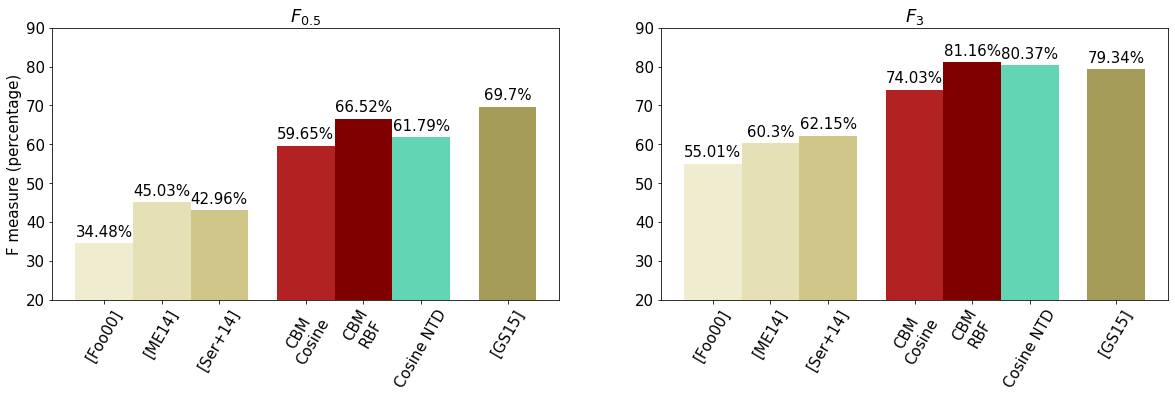

In [8]:
# RWC
plt.rcParams.update({'font.size': 15})


width = 0.5

# Baselines
#baseline_f_mes_zero_five = [34.48,28.81,45.03,42.96,69.70] baseline_f_mes_three = [55.01,46.53,60.30,62.15,79.34]
baseline_f_mes_zero_five = [34.48,45.03,42.96,69.70] 
baseline_f_mes_three = [55.01,60.30,62.15,79.34]

colors_baselines = ['#F0ECCF','#E6E0B6', '#D0C687','#A69C59']#deepskyblue
#algos_baselines = ['Foote\'s\nNovelty\n[Foo00]','CNMF\n[NJ13]','Spectral\nClustering\n[ME14a]','Structural\nFeatures\n[Ser+14]','CNN\n[GS15b]']
algos_baselines = ['[Foo00]','[ME14]','[Ser+14]','[GS15]']

indexes_baselines = [i * width for i in range(len(algos_baselines))]

indexes_baselines[-1] = indexes_baselines[-2] + 5 * width

fig, ax = plt.subplots(1, 2, figsize=(20,5))
for idx_x, x in enumerate(indexes_baselines):
    height = np.array(baseline_f_mes_zero_five)[idx_x]
    ax[0].bar(x, height, color=colors_baselines[idx_x], width=width)
    ax[0].text(x,height + 1, f"{height}%", ha='center', va='bottom', rotation = 0)
    
    height = np.array(baseline_f_mes_three)[idx_x]
    ax[1].bar(x, height, color=colors_baselines[idx_x], width=width)
    ax[1].text(x,height + 1, f"{height}%", ha='center', va='bottom', rotation = 0)

indexes = [i for i in indexes_baselines]
algos = [i for i in algos_baselines]


# CBM
color_CBM = ['firebrick']
algos.append("CBM\nCosine")
idx_cbm_pcp = indexes_baselines[-2] + 1.5 * width
indexes.append(idx_cbm_pcp)
f_mes_cbm_pcp = [59.65, 74.03]
ax[0].bar(idx_cbm_pcp, f_mes_cbm_pcp[0], color=color_CBM[0], width=width)
ax[0].text(idx_cbm_pcp,f_mes_cbm_pcp[0] + 1, f"{f_mes_cbm_pcp[0]}%", ha='center', va='bottom', rotation = 0)
ax[1].bar(idx_cbm_pcp, f_mes_cbm_pcp[1], color=color_CBM[0], width=width)
ax[1].text(idx_cbm_pcp,f_mes_cbm_pcp[1] + 1, f"{f_mes_cbm_pcp[1]}%", ha='center', va='bottom', rotation = 0)

color_CBM = ['maroon']
algos.append("CBM\nRBF")
idx_cbm_pcp = indexes_baselines[-2] + 2.5 * width
indexes.append(idx_cbm_pcp)
f_mes_cbm_pcp = [66.52, 81.16]
ax[0].bar(idx_cbm_pcp, f_mes_cbm_pcp[0], color=color_CBM[0], width=width)
ax[0].text(idx_cbm_pcp,f_mes_cbm_pcp[0] + 1, f"{f_mes_cbm_pcp[0]}%", ha='center', va='bottom', rotation = 0)
ax[1].bar(idx_cbm_pcp, f_mes_cbm_pcp[1], color=color_CBM[0], width=width)
ax[1].text(idx_cbm_pcp,f_mes_cbm_pcp[1] + 1, f"{f_mes_cbm_pcp[1]}%", ha='center', va='bottom', rotation = 0)

color_CBM = ['#62d5b4'] #"#62d5b4", "#317373", "#184a4a"
algos.append("Cosine NTD")
idx_cbm_pcp = indexes_baselines[-2] + 3.5 * width
indexes.append(idx_cbm_pcp)
f_mes_cbm_pcp = [61.79, 80.37]
ax[0].bar(idx_cbm_pcp, f_mes_cbm_pcp[0], color=color_CBM[0], width=width)
ax[0].text(idx_cbm_pcp,f_mes_cbm_pcp[0] + 1, f"{f_mes_cbm_pcp[0]}%", ha='center', va='bottom', rotation = 0)
ax[1].bar(idx_cbm_pcp, f_mes_cbm_pcp[1], color=color_CBM[0], width=width)
ax[1].text(idx_cbm_pcp,f_mes_cbm_pcp[1] + 1, f"{f_mes_cbm_pcp[1]}%", ha='center', va='bottom', rotation = 0)

ax[0].set_xticks(indexes)
ax[0].set_xticklabels(algos, rotation = 60)
ax[0].set_ylabel("F measure (percentage)")
ax[0].set_title("$F_{0.5}$")
ax[0].set_ylim( 20,90 )

ax[1].set_xticks(indexes)
ax[1].set_xticklabels(algos, rotation = 60)
#ax[1].set_ylabel("F measure (percentage)")
ax[1].set_title("$F_{3}$")
ax[1].set_ylim( 20,90 )

#fig.savefig("C:\\Users\\amarmore\\Desktop\\Documents de travail\\Présentations\\Conf\\Posters\\ISMIR 2020\\gemini-master\\figs\\f_mes_plots.pdf", bbox_inches = "tight")#, format='png')

plt.show()

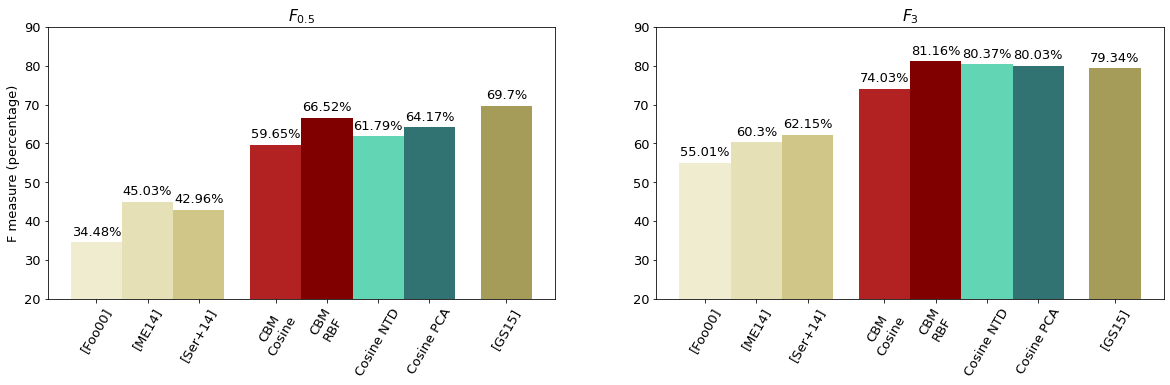

In [9]:
# RWC
plt.rcParams.update({'font.size': 13})


width = 0.5

# Baselines
#baseline_f_mes_zero_five = [34.48,28.81,45.03,42.96,69.70] baseline_f_mes_three = [55.01,46.53,60.30,62.15,79.34]
baseline_f_mes_zero_five = [34.48,45.03,42.96,69.70] 
baseline_f_mes_three = [55.01,60.30,62.15,79.34]

colors_baselines = ['#F0ECCF','#E6E0B6', '#D0C687','#A69C59']#deepskyblue
#algos_baselines = ['Foote\'s\nNovelty\n[Foo00]','CNMF\n[NJ13]','Spectral\nClustering\n[ME14a]','Structural\nFeatures\n[Ser+14]','CNN\n[GS15b]']
algos_baselines = ['[Foo00]','[ME14]','[Ser+14]','[GS15]']

indexes_baselines = [i * width for i in range(len(algos_baselines))]

indexes_baselines[-1] = indexes_baselines[-2] + 6 * width

fig, ax = plt.subplots(1, 2, figsize=(20,5))
for idx_x, x in enumerate(indexes_baselines):
    height = np.array(baseline_f_mes_zero_five)[idx_x]
    ax[0].bar(x, height, color=colors_baselines[idx_x], width=width)
    ax[0].text(x,height + 1, f"{height}%", ha='center', va='bottom', rotation = 0)
    
    height = np.array(baseline_f_mes_three)[idx_x]
    ax[1].bar(x, height, color=colors_baselines[idx_x], width=width)
    ax[1].text(x,height + 1, f"{height}%", ha='center', va='bottom', rotation = 0)

indexes = [i for i in indexes_baselines]
algos = [i for i in algos_baselines]


# CBM
color_CBM = ['firebrick']
algos.append("CBM\nCosine")
idx_cbm_pcp = indexes_baselines[-2] + 1.5 * width
indexes.append(idx_cbm_pcp)
f_mes_cbm_pcp = [59.65, 74.03]
ax[0].bar(idx_cbm_pcp, f_mes_cbm_pcp[0], color=color_CBM[0], width=width)
ax[0].text(idx_cbm_pcp,f_mes_cbm_pcp[0] + 1, f"{f_mes_cbm_pcp[0]}%", ha='center', va='bottom', rotation = 0)
ax[1].bar(idx_cbm_pcp, f_mes_cbm_pcp[1], color=color_CBM[0], width=width)
ax[1].text(idx_cbm_pcp,f_mes_cbm_pcp[1] + 1, f"{f_mes_cbm_pcp[1]}%", ha='center', va='bottom', rotation = 0)

color_CBM = ['maroon']
algos.append("CBM\nRBF")
idx_cbm_pcp = indexes_baselines[-2] + 2.5 * width
indexes.append(idx_cbm_pcp)
f_mes_cbm_pcp = [66.52, 81.16]
ax[0].bar(idx_cbm_pcp, f_mes_cbm_pcp[0], color=color_CBM[0], width=width)
ax[0].text(idx_cbm_pcp,f_mes_cbm_pcp[0] + 1, f"{f_mes_cbm_pcp[0]}%", ha='center', va='bottom', rotation = 0)
ax[1].bar(idx_cbm_pcp, f_mes_cbm_pcp[1], color=color_CBM[0], width=width)
ax[1].text(idx_cbm_pcp,f_mes_cbm_pcp[1] + 1, f"{f_mes_cbm_pcp[1]}%", ha='center', va='bottom', rotation = 0)

color_CBM = ['#62d5b4'] #"#62d5b4", "#317373", "#184a4a"
algos.append("Cosine NTD")
idx_cbm_pcp = indexes_baselines[-2] + 3.5 * width
indexes.append(idx_cbm_pcp)
f_mes_cbm_pcp = [61.79, 80.37]
ax[0].bar(idx_cbm_pcp, f_mes_cbm_pcp[0], color=color_CBM[0], width=width)
ax[0].text(idx_cbm_pcp,f_mes_cbm_pcp[0] + 1, f"{f_mes_cbm_pcp[0]}%", ha='center', va='bottom', rotation = 0)
ax[1].bar(idx_cbm_pcp, f_mes_cbm_pcp[1], color=color_CBM[0], width=width)
ax[1].text(idx_cbm_pcp,f_mes_cbm_pcp[1] + 1, f"{f_mes_cbm_pcp[1]}%", ha='center', va='bottom', rotation = 0)


color_CBM = ['#317373'] #"#62d5b4", "#317373", "#184a4a"
algos.append("Cosine PCA")
idx_cbm_pcp = indexes_baselines[-2] + 4.5 * width
indexes.append(idx_cbm_pcp)
f_mes_cbm_pcp = [64.17, 80.03]
ax[0].bar(idx_cbm_pcp, f_mes_cbm_pcp[0], color=color_CBM[0], width=width)
ax[0].text(idx_cbm_pcp,f_mes_cbm_pcp[0] + 1, f"{f_mes_cbm_pcp[0]}%", ha='center', va='bottom', rotation = 0)
ax[1].bar(idx_cbm_pcp, f_mes_cbm_pcp[1], color=color_CBM[0], width=width)
ax[1].text(idx_cbm_pcp,f_mes_cbm_pcp[1] + 1, f"{f_mes_cbm_pcp[1]}%", ha='center', va='bottom', rotation = 0)

ax[0].set_xticks(indexes)
ax[0].set_xticklabels(algos, rotation = 60)
ax[0].set_ylabel("F measure (percentage)")
ax[0].set_title("$F_{0.5}$")
ax[0].set_ylim( 20,90 )

ax[1].set_xticks(indexes)
ax[1].set_xticklabels(algos, rotation = 60)
#ax[1].set_ylabel("F measure (percentage)")
ax[1].set_title("$F_{3}$")
ax[1].set_ylim( 20,90 )

#fig.savefig("C:\\Users\\amarmore\\Desktop\\Documents de travail\\Présentations\\Conf\\Posters\\ISMIR 2020\\gemini-master\\figs\\f_mes_plots.pdf", bbox_inches = "tight")#, format='png')

plt.show()

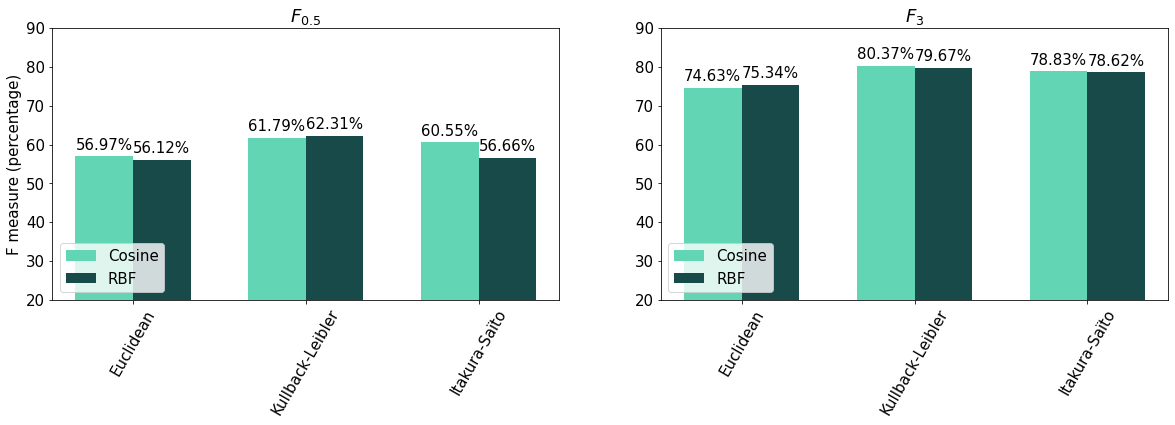

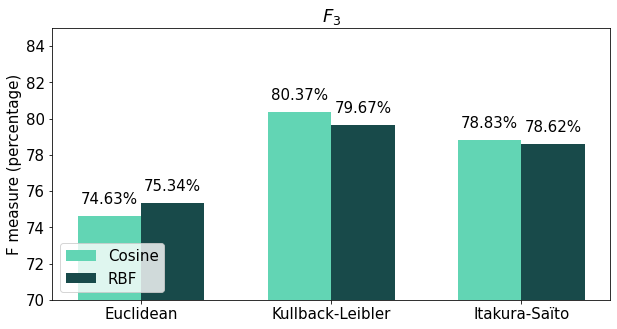

In [19]:
# RWC
plt.rcParams.update({'font.size': 15})


width = 0.5

# Baselines
#baseline_f_mes_zero_five = [34.48,28.81,45.03,42.96,69.70] baseline_f_mes_three = [55.01,46.53,60.30,62.15,79.34]
res_ntd_zero_five = [56.97,56.12,61.79,62.31,60.55,56.66] 
res_ntd_three = [74.63,75.34,80.37,79.67,78.83,78.62]

colors_ntd = ['#62d5b4','#184a4a'] #deepskyblue
#algos_baselines = ['Foote\'s\nNovelty\n[Foo00]','CNMF\n[NJ13]','Spectral\nClustering\n[ME14a]','Structural\nFeatures\n[Ser+14]','CNN\n[GS15b]']

indexes_baselines = [i * width for i in range(len(res_ntd_zero_five))]

current_start = 0

fig, ax = plt.subplots(1, 2, figsize=(20,5))
for idx_res_ntd in range(len(res_ntd_zero_five)):
    height = np.array(res_ntd_zero_five)[idx_res_ntd]
    ax[0].bar(current_start + width, height, color=colors_ntd[idx_res_ntd%2], width=width)
    ax[0].text(current_start + width, height + 1, f"{height}%", ha='center', va='bottom', rotation = 0)
    
    height = np.array(res_ntd_three)[idx_res_ntd]
    ax[1].bar(current_start + width, height, color=colors_ntd[idx_res_ntd%2], width=width)
    ax[1].text(current_start + width,height + 1, f"{height}%", ha='center', va='bottom', rotation = 0)
    current_start += width
    if idx_res_ntd%2 == 1:
        current_start += width


algos = ["Euclidean", "Kullback-Leibler", "Itakura-Saïto"]

ax[0].set_xticks([1.5*width, 4.5*width, 7.5*width])
ax[0].set_xticklabels(algos, rotation = 60)
ax[0].set_ylabel("F measure (percentage)")
ax[0].set_title("$F_{0.5}$")
ax[0].set_ylim( 20,90 )

ax[1].set_xticks([1.5*width, 4.5*width, 7.5*width])
ax[1].set_xticklabels(algos, rotation = 60)
#ax[1].set_ylabel("F measure (percentage)")
ax[1].set_title("$F_{3}$")
ax[1].set_ylim( 20,90 )

ax[0].legend(labels=["Cosine","RBF"], loc='lower left')
ax[1].legend(labels=["Cosine","RBF"], loc='lower left')


#fig.savefig("C:\\Users\\amarmore\\Desktop\\Documents de travail\\Présentations\\Conf\\Posters\\ISMIR 2020\\gemini-master\\figs\\f_mes_plots.pdf", bbox_inches = "tight")#, format='png')

plt.show()

current_start = 0


fig, ax = plt.subplots(1, 1, figsize=(10,5))
for idx_res_ntd in range(len(res_ntd_zero_five)):
    height = np.array(res_ntd_three)[idx_res_ntd]
    ax.bar(current_start + width, height, color=colors_ntd[idx_res_ntd%2], width=width)
    ax.text(current_start + width,height + 0.5, f"{height}%", ha='center', va='bottom', rotation = 0)
    current_start += width
    if idx_res_ntd%2 == 1:
        current_start += width


ax.set_xticks([1.5*width, 4.5*width, 7.5*width])
ax.set_xticklabels(algos, rotation = 0)
ax.set_ylabel("F measure (percentage)")
ax.set_title("$F_{3}$")
ax.set_ylim( 70,85 )

ax.legend(labels=["Cosine","RBF"], loc='lower left')


#fig.savefig("C:\\Users\\amarmore\\Desktop\\Documents de travail\\Présentations\\Conf\\Posters\\ISMIR 2020\\gemini-master\\figs\\f_mes_plots.pdf", bbox_inches = "tight")#, format='png')

plt.show()


In [11]:
def plot_kernels_as(results_diff_as, kernels_or_features, autosimilarities, tol, title = None):
    # Order results_diff_as: kernels ou features, as, tol
    subaxis = autosimilarities
    plt.rcParams.update({'font.size': 18})
    
    width=0.25
    gap = (len(autosimilarities) + 1)*width
    colors = ["#62d5b4","#184a4a"]
    
    fig, ax = plt.subplots(1, 1, figsize=(11,4))
    ax.set_ylim( 25, 110 )
    tab = []
    current_start = 0
    for i in range(len(autosimilarities)):
        indexes = [current_start + j*gap for j in range(len(kernels_or_features))]
        tab.append(ax.bar(indexes, results_diff_as[:,i,tol], color=colors[i], width=width, align='edge'))
        for idx_x, x in enumerate(indexes):
            height = results_diff_as[idx_x, i, tol] 
            plt.text(x +width/2,height + 2, f"{height}%", ha='center', va='bottom', rotation = 90)
        current_start += width

    ax.set_xticks([current_start/2 + j*gap for j in range(len(kernels_or_features))])
    ax.set_xticklabels(kernels_or_features)
    if tol == 1:
        ax.legend(labels=subaxis, loc='upper left', ncol = 3)
    else:
        ax.legend(labels=subaxis, loc='upper left', ncol = 3)

    ax.set_ylabel("F measure")
    #fig.savefig("C:/Users/amarmore/Desktop/Mes papiers/figures/results_barcomp_05.pdf", bbox_inches = "tight")#, format='png')
    if title != None:
        plt.title(title)
    plt.show()

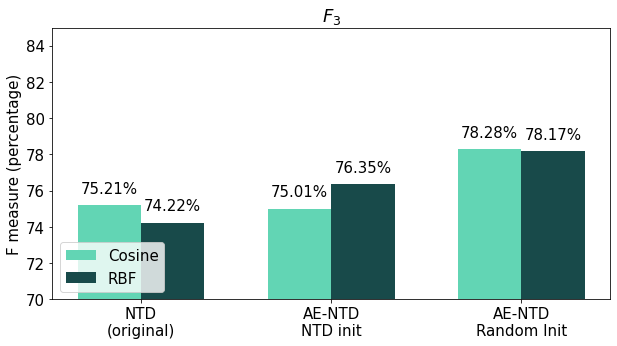

In [20]:
# RWC
plt.rcParams.update({'font.size': 15})


width = 0.5

# Baselines
#baseline_f_mes_zero_five = [34.48,28.81,45.03,42.96,69.70] baseline_f_mes_three = [55.01,46.53,60.30,62.15,79.34]
#res_ntd_zero_five = [75.21, 74.22, 75.01, 76.35, 78.28, 78.17] 
res_ntd_three = [75.21, 74.22, 75.01, 76.35, 78.28, 78.17] 

colors_ntd = ['#62d5b4','#184a4a'] #deepskyblue
#algos_baselines = ['Foote\'s\nNovelty\n[Foo00]','CNMF\n[NJ13]','Spectral\nClustering\n[ME14a]','Structural\nFeatures\n[Ser+14]','CNN\n[GS15b]']

indexes_baselines = [i * width for i in range(len(res_ntd_zero_five))]

current_start = 0

algos = ["NTD\n(original)", "AE-NTD\nNTD init", "AE-NTD\nRandom Init"]


fig, ax = plt.subplots(1, 1, figsize=(10,5))
for idx_res_ntd in range(len(res_ntd_zero_five)):
    height = np.array(res_ntd_three)[idx_res_ntd]
    ax.bar(current_start + width, height, color=colors_ntd[idx_res_ntd%2], width=width)
    ax.text(current_start + width,height + 0.5, f"{height}%", ha='center', va='bottom', rotation = 0)
    current_start += width
    if idx_res_ntd%2 == 1:
        current_start += width


ax.set_xticks([1.5*width, 4.5*width, 7.5*width])
ax.set_xticklabels(algos, rotation = 0)
ax.set_ylabel("F measure (percentage)")
ax.set_title("$F_{3}$")
ax.set_ylim( 70,85 )

ax.legend(labels=["Cosine","RBF"], loc='lower left')


#fig.savefig("C:\\Users\\amarmore\\Desktop\\Documents de travail\\Présentations\\Conf\\Posters\\ISMIR 2020\\gemini-master\\figs\\f_mes_plots.pdf", bbox_inches = "tight")#, format='png')

plt.show()


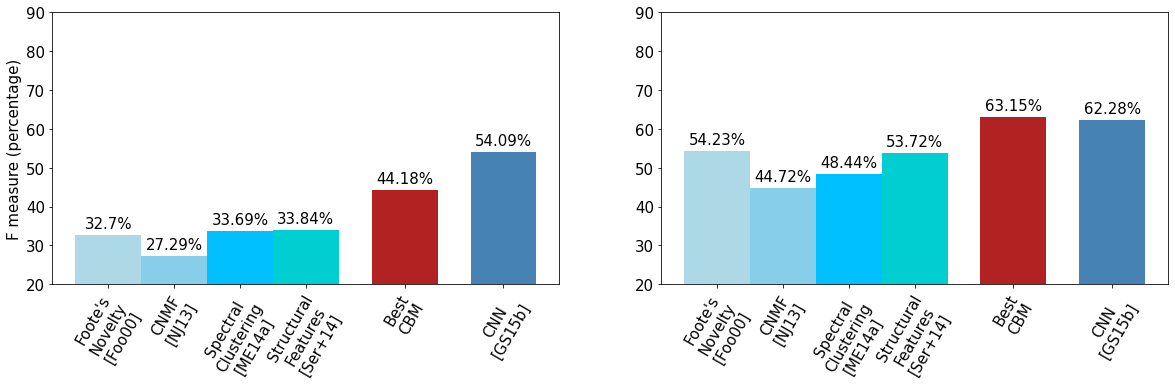

In [13]:
# SALAMI
plt.rcParams.update({'font.size': 15})


width = 0.5

# Baselines
baseline_f_mes_zero_five = [32.70,27.29,33.69,33.84,54.09]
baseline_f_mes_three = [54.23,44.72,48.44,53.72,62.28]

colors_baselines = ['lightblue','skyblue','deepskyblue','darkturquoise','steelblue'] #deepskyblue
algos_baselines = ['Foote\'s\nNovelty\n[Foo00]','CNMF\n[NJ13]','Spectral\nClustering\n[ME14a]','Structural\nFeatures\n[Ser+14]','CNN\n[GS15b]']

colors_baselines = ['lightblue','skyblue','deepskyblue','darkturquoise','steelblue'] #deepskyblue
algos_baselines = ['Foote\'s\nNovelty\n[Foo00]','CNMF\n[NJ13]','Spectral\nClustering\n[ME14a]','Structural\nFeatures\n[Ser+14]','CNN\n[GS15b]']

indexes_baselines = [i * width for i in range(len(algos_baselines))]

indexes_baselines[-1] = indexes_baselines[-2] + 3 * width

fig, ax = plt.subplots(1, 2, figsize=(20,5))
for idx_x, x in enumerate(indexes_baselines):
    height = np.array(baseline_f_mes_zero_five)[idx_x]
    ax[0].bar(x, height, color=colors_baselines[idx_x], width=width)
    ax[0].text(x,height + 1, f"{height}%", ha='center', va='bottom', rotation = 0)
    
    height = np.array(baseline_f_mes_three)[idx_x]
    ax[1].bar(x, height, color=colors_baselines[idx_x], width=width)
    ax[1].text(x,height + 1, f"{height}%", ha='center', va='bottom', rotation = 0)

indexes = [i for i in indexes_baselines]
algos = [i for i in algos_baselines]


# CBM
color_CBM = ['firebrick']
algos.append("Best\nCBM")
idx_cbm_pcp = indexes_baselines[-2] + 1.5 * width
indexes.append(idx_cbm_pcp)
f_mes_cbm_pcp = [44.18, 63.15]
ax[0].bar(idx_cbm_pcp, f_mes_cbm_pcp[0], color=color_CBM[0], width=width)
ax[0].text(idx_cbm_pcp,f_mes_cbm_pcp[0] + 1, f"{f_mes_cbm_pcp[0]}%", ha='center', va='bottom', rotation = 0)
ax[1].bar(idx_cbm_pcp, f_mes_cbm_pcp[1], color=color_CBM[0], width=width)
ax[1].text(idx_cbm_pcp,f_mes_cbm_pcp[1] + 1, f"{f_mes_cbm_pcp[1]}%", ha='center', va='bottom', rotation = 0)

ax[0].set_xticks(indexes)
ax[0].set_xticklabels(algos, rotation = 60)
ax[0].set_ylabel("F measure (percentage)")
#ax[0].set_title("F0.5")
ax[0].set_ylim( 20,90 )

ax[1].set_xticks(indexes)
ax[1].set_xticklabels(algos, rotation = 60)
#ax[1].set_ylabel("F measure (percentage)")
#ax[1].set_title("F3")
ax[1].set_ylim( 20,90 )

#fig.savefig("C:\\Users\\amarmore\\Desktop\\Documents de travail\\Présentations\\Conf\\Posters\\ISMIR 2020\\gemini-master\\figs\\f_mes_plots.pdf", bbox_inches = "tight")#, format='png')

plt.show()